In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Result 1
This results apply when:
* $\alpha \neq 0$
* $v=1$
* $T_A = T_B = T$

In [5]:
def evolution0(p0, b, c, T_A, T_B, alpha, tmax):
    p = [p0]

    for t in range(1, tmax):
        p_old = p[t-1] 
        x1 = (p_old ** 2)*(1+b-c)*(1-(1-p_old)*(1-alpha)*T_B)
        x2 = p_old*(1-p_old)*(1-c)*(p_old*(1-alpha)*T_B+1-T_B)
        x3 = p_old*(1-p_old)*(1+b)*(p_old*(1-alpha)+alpha)*T_A
        x4 = ((1-p_old)**2)*p_old*(1-alpha)*T_A
        omega = 1+p_old*(b-c)
        result = (x1+x2+x3+x4)/omega
        p.append(result)
        if result > 1:
            break

    return p

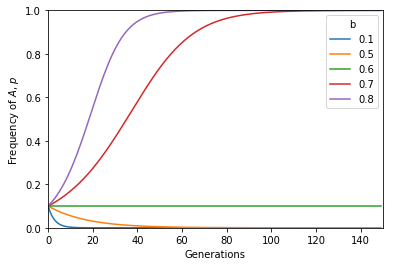

In [6]:
p0 = 0.1
c = 0.9
T_A =0.6
T_B = 0.6
alpha = 1
generations = 150

for b in (0.1, 0.5, 0.6, 0.7, 0.8):
    plt.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=b)

plt.xlabel('Generations')
plt.ylabel('Frequency of $A$, $p$')
plt.ylim(0, 1)
plt.xlim(0, generations)
plt.legend(title='b')

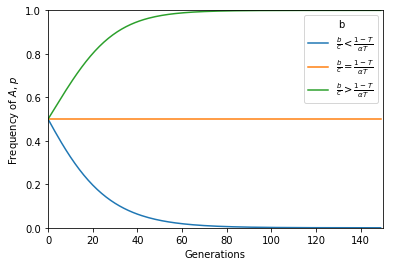

In [7]:
p0 = 0.5
c = 0.9
T_A =0.6
T_B = 0.6
alpha = 1
generations = 150

b = 0.5
plt.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} < \frac{1-T}{\alpha T}$')
b = 0.6
plt.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} = \frac{1-T}{\alpha T}$')
b = 0.7
plt.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} > \frac{1-T}{\alpha T}$')
plt.legend(title='b')
plt.xlabel('Generations')
plt.ylabel('Frequency of $A$, $p$')
plt.ylim(0, 1)
plt.xlim(0, generations);
plt.savefig('figure_first_result.png')

## Result 1.2 - No correlation between transmission and cooperation
Applies when:
* $\alpha = 0$
* $v=1$



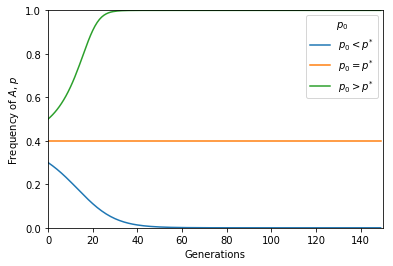

In [8]:
b = 0.5
c = 0.9
T_A = 0.8
T_B = 0.2
alpha = 0
generations = 150

p_star = c*(1-T_B)/(b*(T_A-T_B))-1/b
plt.plot(evolution0(p_star-0.1, b, c, T_A, T_B, alpha, generations), label=r'$p_0 < p^{*}$')
plt.plot(evolution0(p_star, b, c, T_A, T_B, alpha, generations), label=r'$p_0 = p^{*}$')
plt.plot(evolution0(p_star+0.1, b, c, T_A, T_B, alpha, generations), label=r'$p_0 > p^{*}$')
plt.legend(title=r'$p_0$')
plt.xlabel('Generations')
plt.ylabel('Frequency of $A$, $p$')
plt.ylim(0, 1)
plt.xlim(0, generations);
plt.savefig('figure_equilibrium.png')

## Result 2
Applies:
* $v=0$

In [28]:
def evolution2(p0, b, c, T_A, T_B, alpha, tmax):
    p = [p0]

    for t in range(1, tmax):
        p_old = p[t-1] 
        x1 = (p_old**2)*(alpha+(1-alpha)*(p_old+(1-p_old)*(1-T_B)))
        x2 = p_old*(1-p_old)*(alpha*(1-T_B)+(1-alpha)*(p_old+(1-p_old)*(1-T_B)))
        x3 = p_old*(1-p_old)*(alpha*T_A+(1-alpha)*p_old*T_A)
        x4 = ((1-p_old)**2)*p_old*(1-alpha)*T_A
        result = (x1+x2+x3+x4)
        p.append(result)
        if result > 1:
            break

    return p

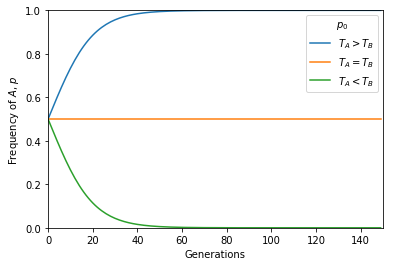

In [29]:
p0 = 0.5
b = 0.5
c = 0.9
T_A = 0.5
alpha = 0.51
generations = 150

T_B = T_A - 0.1 # 0.4
plt.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A > T_B$')
T_B = T_A # 0.5
plt.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A = T_B$')
T_B = T_A + 0.1 # 0.6
plt.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A < T_B$')
plt.legend(title=r'$p_0$')
plt.xlabel('Generations')
plt.ylabel('Frequency of $A$, $p$')
plt.ylim(0, 1)
plt.xlim(0, generations);
plt.savefig('figure_v0.png')